# Random Forest classifier - Full dataset

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load Data

In [2]:
DATA_DIR = '../../data/raw/full/'

In [3]:
import pandas as pd

train_data = pd.read_csv(DATA_DIR + 'train.csv')

train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53188 entries, 0 to 53187
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 45.4 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,8,1,1,5,0,0,0,0,0,0,...,1,4,0,11,1,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,1,1,1,21592,0,0,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,4,4,2,194,1,1,0,0,0,0
3,3,0,0,6,0,0,0,0,0,0,...,1,2,1,3165,0,0,0,0,0,1
4,3,0,0,0,0,0,0,0,0,0,...,1,2,5,4914,0,-1,0,0,0,0


In [4]:
valid_data = pd.read_csv(DATA_DIR + 'valid.csv')

valid_data.info()
valid_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17729 entries, 0 to 17728
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 15.1 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,0,0,3,0,0,0,0,0,0,...,1,2,1,14391,0,0,0,0,0,1
1,1,1,0,2,0,0,0,0,0,0,...,1,2,1,14383,1,1,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,1,3,0,1798,1,2,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,1,2,5,593,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,1,2,2,14392,1,-1,0,0,0,0


In [5]:
test_data = pd.read_csv(DATA_DIR + 'test.csv')

test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17730 entries, 0 to 17729
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 15.2 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,0,0,1,0,0,0,0,0,0,...,1,4,0,292,1,1,0,0,1,1
1,2,0,0,0,0,0,0,0,0,0,...,1,2,1,598,0,0,0,0,0,0
2,2,0,0,5,0,0,0,0,0,0,...,1,2,5,10792,1,0,0,0,0,1
3,2,0,0,0,0,0,0,0,0,0,...,1,2,1,21599,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,1198,0,0,0,0,0,0


## Get X and y data

In [6]:
TARGET_COL_NAME = 'phishing'

In [7]:
X_train = train_data.drop(TARGET_COL_NAME, axis=1)
y_train = train_data[TARGET_COL_NAME]

In [8]:
y_train.value_counts()

0    34800
1    18388
Name: phishing, dtype: int64

In [9]:
X_valid = valid_data.drop(TARGET_COL_NAME, axis=1)
y_valid = valid_data[TARGET_COL_NAME]

In [10]:
y_valid.value_counts()

0    11600
1     6129
Name: phishing, dtype: int64

In [11]:
X_test = test_data.drop(TARGET_COL_NAME, axis=1)
y_test = test_data[TARGET_COL_NAME]

In [12]:
y_test.value_counts()

0    11600
1     6130
Name: phishing, dtype: int64

## Hyperparameter tuning

In [13]:
RANDOM_STATE = 42

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

# Grid search over hyperparameters
max_depths = [5, 10, 20, 30, 40, 50]
n_estimators = [10, 20, 30, 40, 50, 60, 70]
for max_depth in max_depths:
    for n in n_estimators:
        print('Max depth: {}, n_estimators: {}'.format(max_depth, n))
        model = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=RANDOM_STATE)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        print('Validation data - Accuracy: {:.3f}, Balanced accuracy: {:.3f}, F1: {:.3f}, Precision: {:.3f}, Recall: {:.3f}'
              .format(accuracy_score(y_valid, y_pred),
                      balanced_accuracy_score(y_valid, y_pred),
                      f1_score(y_valid, y_pred),
                      precision_score(y_valid, y_pred),
                      recall_score(y_valid, y_pred)))
        print('-' * 20)


Max depth: 5, n_estimators: 10
Validation data - Accuracy: 0.912, Balanced accuracy: 0.915, F1: 0.879, Precision: 0.836, Recall: 0.926
--------------------
Max depth: 5, n_estimators: 20
Validation data - Accuracy: 0.912, Balanced accuracy: 0.913, F1: 0.878, Precision: 0.845, Recall: 0.915
--------------------
Max depth: 5, n_estimators: 30
Validation data - Accuracy: 0.913, Balanced accuracy: 0.914, F1: 0.879, Precision: 0.846, Recall: 0.915
--------------------
Max depth: 5, n_estimators: 40
Validation data - Accuracy: 0.914, Balanced accuracy: 0.914, F1: 0.880, Precision: 0.846, Recall: 0.917
--------------------
Max depth: 5, n_estimators: 50
Validation data - Accuracy: 0.914, Balanced accuracy: 0.915, F1: 0.881, Precision: 0.847, Recall: 0.919
--------------------
Max depth: 5, n_estimators: 60
Validation data - Accuracy: 0.914, Balanced accuracy: 0.915, F1: 0.881, Precision: 0.846, Recall: 0.918
--------------------
Max depth: 5, n_estimators: 70
Validation data - Accuracy: 0.914

## Retrain the best model - training + validation dataset

In [15]:
best_max_depth = 30
best_n_estimator = 40

In [16]:
X_train_and_valid = pd.concat([X_train, X_valid])
X_train_and_valid.shape

(70917, 111)

In [17]:
y_train_and_valid = pd.concat([y_train, y_valid])
y_train_and_valid.shape

(70917,)

In [18]:
best_clf = RandomForestClassifier(n_estimators=best_n_estimator, max_depth=max_depth, random_state=RANDOM_STATE)

best_clf.fit(X_train_and_valid, y_train_and_valid)

RandomForestClassifier(max_depth=50, n_estimators=40, random_state=42)

## Save trained model

In [19]:
from joblib import dump

dump(best_clf, "../../models/random_forest_full.pkl") 

['../../models/random_forest_full.pkl']

## Evaluate on test data

In [20]:
from sklearn.metrics import matthews_corrcoef, roc_curve

def fpr(y_true, y_pred, sample_weight=None):
    return roc_curve(y_true, y_pred, sample_weight=sample_weight)[0][1]

METRICS = [
    ('F1', f1_score),
    ('Accuracy', accuracy_score),
    ('Balanced accuracy', balanced_accuracy_score),
    ('MCC', matthews_corrcoef),
    ('Precision', precision_score),
    ('Recall', recall_score),
    ('FPR', fpr)
]

In [21]:
y_pred = best_clf.predict(X_test)

Metric values:

F1: 0.956
Accuracy: 0.969
Balanced accuracy: 0.966
MCC: 0.932
Precision: 0.956
Recall: 0.955
FPR: 0.023




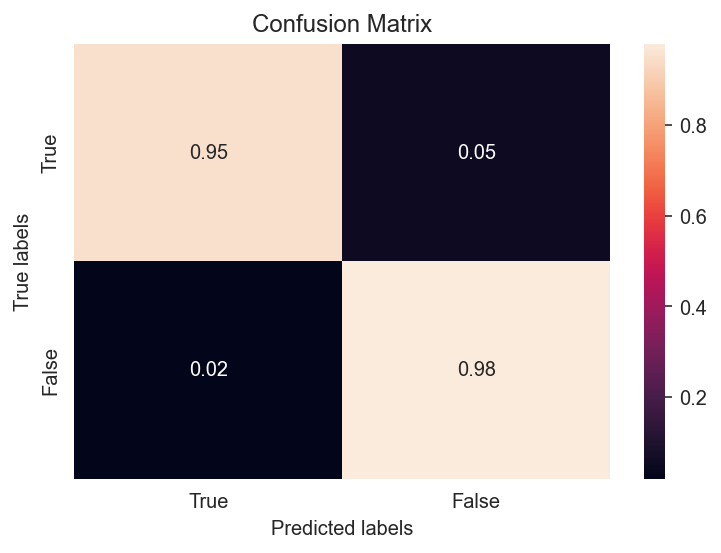

In [22]:
from bin.evaluation.evaluation import evaluate_classifier

evaluate_classifier(y_test, y_pred, y_pred, METRICS)

## Model analysis

In [24]:
from joblib import load

best_clf = load("../../models/random_forest_full.pkl")

In [25]:
TOP_N_FEATURES = 3

In [26]:
feature_importances = list(zip(X_train_and_valid.columns, best_clf.feature_importances_))
feature_importances.sort(key=lambda x: x[1], reverse=True)

feature_importances

[('directory_length', 0.13109729573899565),
 ('qty_dollar_directory', 0.07042525818743604),
 ('time_domain_activation', 0.06370651341126392),
 ('qty_slash_directory', 0.04624457244594577),
 ('length_url', 0.03371903712598866),
 ('qty_slash_url', 0.0318844095292531),
 ('qty_dot_file', 0.03177672901906645),
 ('qty_underline_directory', 0.029111229417178957),
 ('qty_asterisk_file', 0.02896562793116028),
 ('qty_plus_file', 0.027917020966817963),
 ('qty_at_file', 0.027826877024328362),
 ('qty_at_directory', 0.027755864372851314),
 ('file_length', 0.02668919925577924),
 ('ttl_hostname', 0.02569349524844957),
 ('asn_ip', 0.022559582143545705),
 ('time_domain_expiration', 0.02236621558567655),
 ('time_response', 0.021948006893714823),
 ('domain_length', 0.02051743170354254),
 ('qty_dot_directory', 0.019214886843867275),
 ('qty_hyphen_file', 0.01737292139093078),
 ('qty_dot_domain', 0.015755390486357997),
 ('qty_exclamation_file', 0.014976805927831965),
 ('qty_vowels_domain', 0.0144721453292704

In [27]:
feature_importances[:TOP_N_FEATURES]

[('directory_length', 0.13109729573899565),
 ('qty_dollar_directory', 0.07042525818743604),
 ('time_domain_activation', 0.06370651341126392)]